In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
PS4C_dir = Path('/home/zequnl/Projects/PS4C/model/lagache/')

In [2]:
PS4C_freqs = ["100", "150"]

## Load Lagache model

In [3]:
lagache_counts = [
    np.genfromtxt(PS4C_dir / f'ns{freq}_radio.dat', 
                  names=('S', 'dNdS'))  
    for freq in PS4C_freqs]

In [4]:
# import h5py

# radio_dir = "/tigress/zequnl/radio/lagache_massage/"
# f = h5py.File(radio_dir + '/catalog_100.0.h5', 'r')
# f.keys()

In [5]:
freqs = ["100.0", "143.0"]

## Load in websky hdf5 catalogs

In [6]:
import h5py
with h5py.File(f'/tigress/zequnl/radio/catalog_{int(float(143))}.h5', 'r') as f:
    print(len(f['flux']))

281768473


In [7]:
import healpy as hp
281768473 / hp.nside2npix(2048)

5.598236580689748

In [8]:
281768473 / 9e8

0.3130760811111111

100.0
143.0
100.0
143.0


<ipython-input-17-cce7e56b644f>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=normed_counts[freq] / np.sqrt(count[freq]),
'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


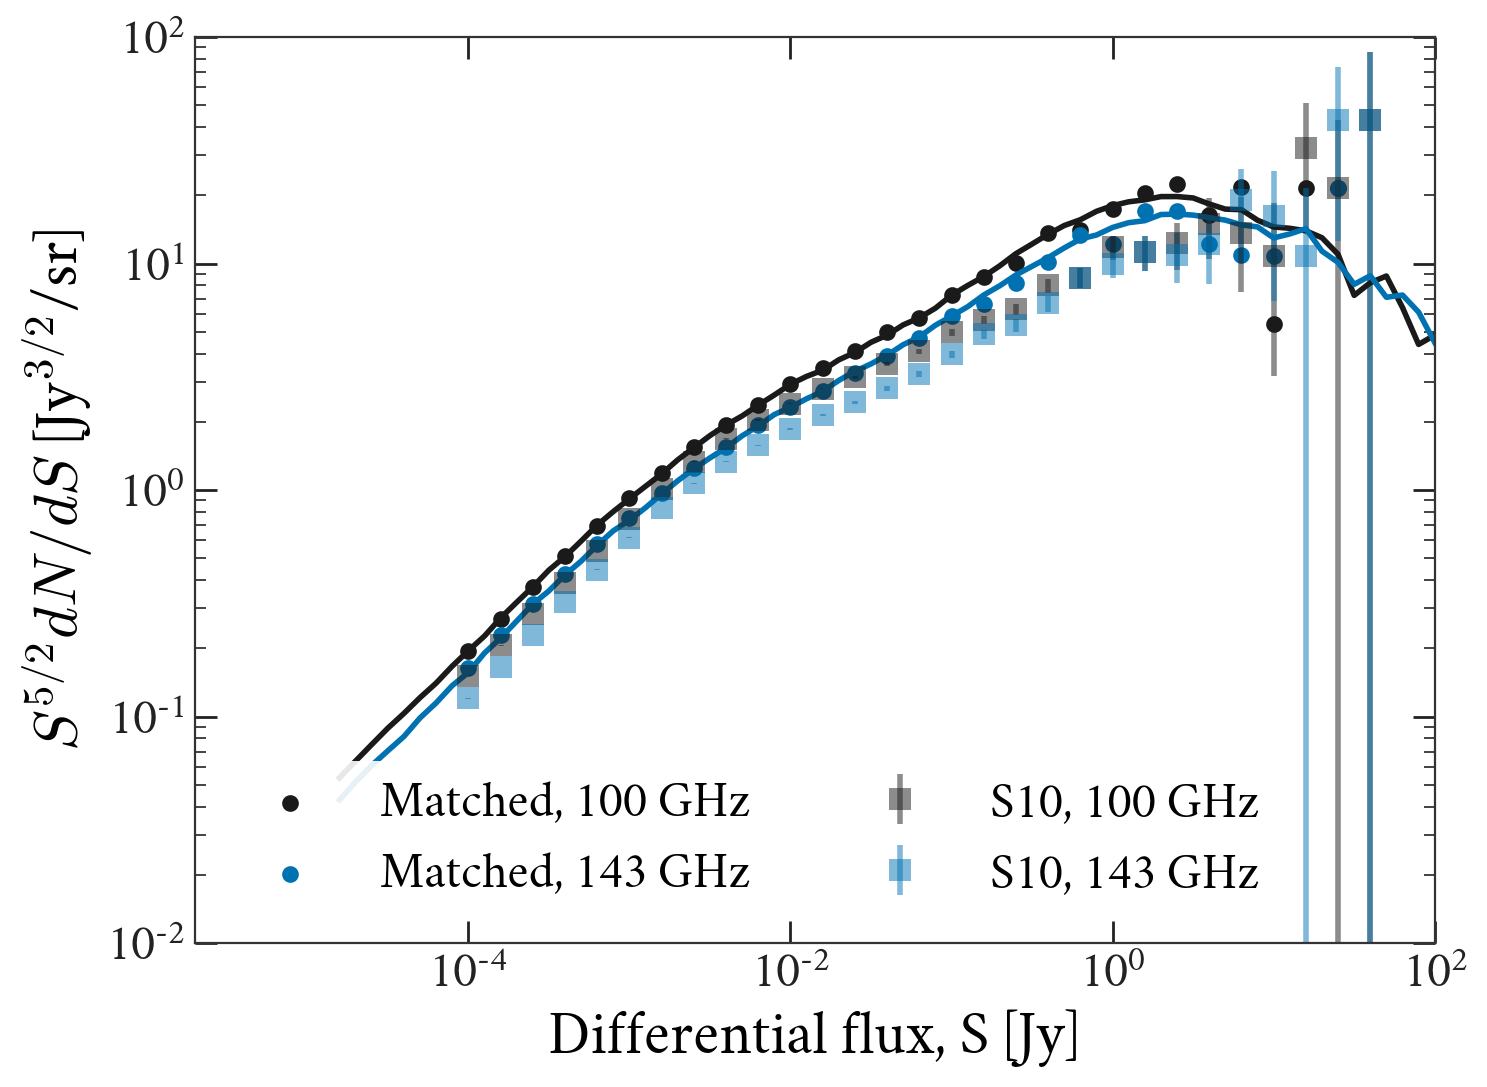

In [17]:
import h5py

count = {}
normed_counts = {}

for freq in freqs:
    print(freq)
    with h5py.File(f'/tigress/zequnl/radio/lagache_sed_massage/catalog_{freq}.h5', 'r') as f:
        
        bins = np.arange(-4.1, 2.5, 0.2)
        hist, bin_edges = np.histogram(np.log10(f['flux']), bins=bins)
        mids = (bin_edges[1:] + bin_edges[:-1])/2
        
        count[freq] = hist
        
        normed_count = (hist) * (10**mids)**2.5 / np.diff(10**bin_edges) / (4 * np.pi)
        normed_counts[freq] = normed_count
        
def plot_freq(index):
    freq = freqs[index]
    S = lagache_counts[index]['S']
    dN = lagache_counts[index]['dNdS']
    
    
    plt.plot(S, dN * S**(5/2), '-', 
             color=f'C{index}',)
    plt.scatter(10**mids, normed_counts[freq],
             color=f'C{index}',
             label=f"Matched, {int(round(float(freq)))} GHz" )
    
plt.figure(figsize=(8,6), facecolor='white')

for i, freq in enumerate(freqs):
    plot_freq(i)
    
# AD HOC
for freq in freqs:
    print(freq)
    with h5py.File(f'/tigress/zequnl/radio/catalog_{int(float(freq))}.h5', 'r') as f:
        
        bins = np.arange(-4.1, 2.5, 0.2)
        hist, bin_edges = np.histogram(np.log10(f['flux']), bins=bins)
        mids = (bin_edges[1:] + bin_edges[:-1])/2
        
        count[freq] = hist
        
        normed_count = (hist) * (10**mids)**2.5 / np.diff(10**bin_edges) / (4 * np.pi)
        normed_counts[freq] = normed_count
        
def plot_freq(index):
    freq = freqs[index]
    S = lagache_counts[index]['S']
    dN = lagache_counts[index]['dNdS']
    
    
#     plt.plot(S, dN * S**(5/2), '-', 
# #              color=f'C{index+1}',)
#     plt.scatter(10**mids, normed_counts[freq],
# #              color=f'C{index+3}', 
#              marker="s",
#              label=f"Sehgal {freq}", alpha=0.5)

    plt.errorbar(10**mids, normed_counts[freq],
             yerr=normed_counts[freq] / np.sqrt(count[freq]),
            ls='none',
                 marker='s',
             color=f'C{index}',
                 alpha=0.5,
             label=f"S10, {int(round(float(freq)))} GHz" )
    
# plt.figure(figsize=(6,5), facecolor='white')

for i, freq in enumerate(freqs):
    plot_freq(i)
    
# plt.title('Lagache')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2, 1e2)
plt.xlim(2e-6, 1e2)

leg = plt.legend(ncol=2, frameon=True, facecolor='white', framealpha=0.9)
leg.get_frame().set_linewidth(0.0)

plt.ylabel('$S^{5/2} dN/dS$ [Jy$^{3/2}$/sr]')
plt.xlabel('Differential flux, S [Jy]')
plt.savefig("resampling.pdf")

# Alpha plot

In [3]:
import h5py

In [4]:
freqs = ["27.3", "44.0", "70.0", "90.2", "100.0", "143.0", "210.0", "217.0"]

In [5]:
def trunc(x):
    if x == "70.0":
        return x
    
    if x[-2:] == ".0":
        return x[:-2]
    else:
        return x

In [6]:
def assess_alpha_sehgal(f1, f2):
    logfmid = (np.log10(float(f1)) + np.log10(float(f2))) / 2

    with h5py.File(f'/tigress/zequnl/radio/catalog_{trunc(f1)}.h5', 'r') as f:
        logflux1 = np.log10(f['flux'])
    with h5py.File(f'/tigress/zequnl/radio/catalog_{trunc(f2)}.h5', 'r') as f:
        logflux2 = np.log10(f['flux'])
        
    alpha = (logflux2 - logflux1) / (np.log10(float(f2)) - np.log10(float(f1)))
    return np.mean(alpha), np.std(alpha), logfmid

def assess_alpha_massage(f1, f2):
    logfmid = (np.log10(float(f1)) + np.log10(float(f2))) / 2

    with h5py.File(f'/tigress/zequnl/radio/lagache_sed_massage/catalog_{f1}.h5', 'r') as f:
        logflux1 = np.log10(f['flux'])
    with h5py.File(f'/tigress/zequnl/radio/lagache_sed_massage/catalog_{f2}.h5', 'r') as f:
        logflux2 = np.log10(f['flux'])
        
    alpha = (logflux2 - logflux1) / (np.log10(float(f2)) - np.log10(float(f1)))
    return np.mean(alpha), np.std(alpha), logfmid
    

In [9]:
sehgal_alpha_mean = []
sehgal_alpha_lo = []
sehgal_alpha_hi = []
sehgal_alpha_std = []
massage_alpha_mean = []
massage_alpha_lo = []
massage_alpha_hi = []
massage_alpha_std = []
logfmids = []

for i in range(0, (len(freqs) - 1)):
    alpha_mean, alpha_std, logfmid = assess_alpha_sehgal(freqs[i], freqs[i+1])
    sehgal_alpha_mean.append(alpha_mean)
    sehgal_alpha_std.append(alpha_std)
    alpha_mean, alpha_std, logfmid = assess_alpha_massage(freqs[i], freqs[i+1])
    massage_alpha_mean.append(alpha_mean)
    massage_alpha_std.append(alpha_std)
    logfmids.append(logfmid)

In [ ]:
np.percentile(0.68)

In [ ]:
dd = {'sehgal_alpha_mean':sehgal_alpha_mean, 
      'sehgal_alpha_std': sehgal_alpha_std,
 'massage_alpha_mean': massage_alpha_mean,
 'massage_alpha_std': massage_alpha_std,
 'logfmids': logfmids
}

In [58]:
np.save('dd', dd)

In [ ]:
plt.plot(10**np.array(logfmids), sehgal_alpha_mean)
plt.fill_between(10**np.array(logfmids), np.array(sehgal_alpha_mean) - np.array(sehgal_alpha_std), 
                 np.array(sehgal_alpha_mean) + np.array(sehgal_alpha_std), alpha=0.2)
plt.plot(10**np.array(logfmids), massage_alpha_mean)
plt.fill_between(10**np.array(logfmids), np.array(massage_alpha_mean) - np.array(massage_alpha_std), 
                 np.array(massage_alpha_mean) + np.array(massage_alpha_std), alpha=0.2)
plt.ylim(-2, 2)